In [1]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt
plt.gray();
plt.rcParams['figure.figsize'] = (10,7);

<Figure size 720x504 with 0 Axes>

## Calculate Fourier Weight Matrix

In [17]:
def W_matrix(N):
  w_matrix = np.ones([N,2*N], dtype = float)
  for i in range(N):
    for j in range(N):
      w_matrix[i,j] = np.cos(2*np.pi*i*j/N)
    for j in range(N,2*N):
      w_matrix[i,j] = -1*np.sin(2*np.pi*i*(j-N)/N)
  return w_matrix

In [59]:
N = 32
x = np.random.random(size=[1, N])

# Compute Fourier transform using method described above:
W_x = W_matrix(N)
y = np.matmul(x, W_x)

# Discrete Fourier transform via package
fft = np.fft.fft(x)
y_fft = np.hstack([fft.real, fft.imag])

print('rmse: ', np.sqrt(np.mean((y - y_fft)**2)))

rmse:  1.099452683705926e-14


Text(0.5, 1.05, 'Fourier Weight Matrix')

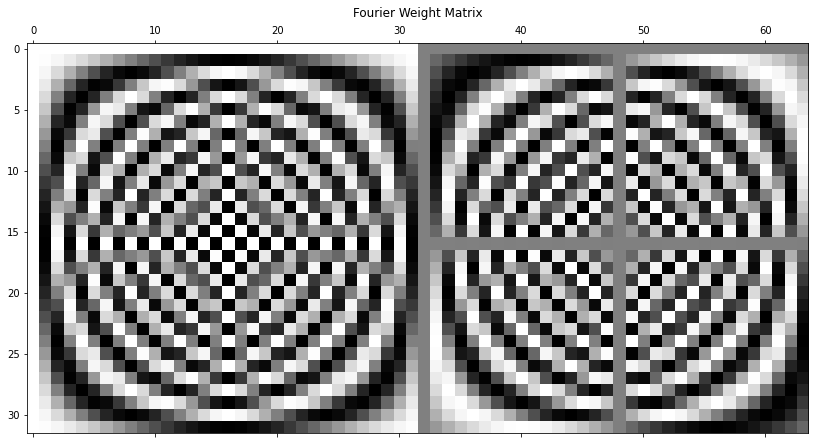

In [60]:
plt.matshow(W_x)
plt.title('Fourier Weight Matrix')

Text(0.5, 1.05, 'Learned Fourier Weight Matrix')

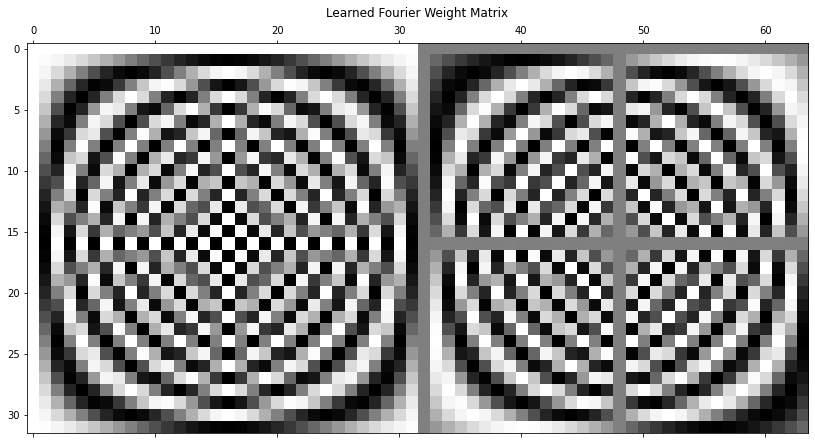

In [74]:
plt.matshow(W_learned)
plt.title('Learned Fourier Weight Matrix')

## Comupute Fourier Weights via Gradient Descent

In [62]:
import tensorflow as tf

In [72]:
W_learned = tf.Variable(np.random.random([N, 2 * N]) - 0.5)  # to have both positive and negative values

losses = []
rmse = []

for i in range(500):

  x = np.random.random([1, N]) - .5  # to have both positive and negative values
  y = np.matmul(x, W_x)

  with tf.GradientTape() as g:
    y_pred = tf.matmul(x, W_learned);
    loss = tf.reduce_sum(tf.square(y_pred - y))

  W_grad = g.gradient(loss, W_learned);
  W_learned = tf.Variable(W_learned - 0.1*W_grad);

  losses.append(loss);
  rmse.append(np.sqrt(np.mean((W_learned - W_x)**2))) 

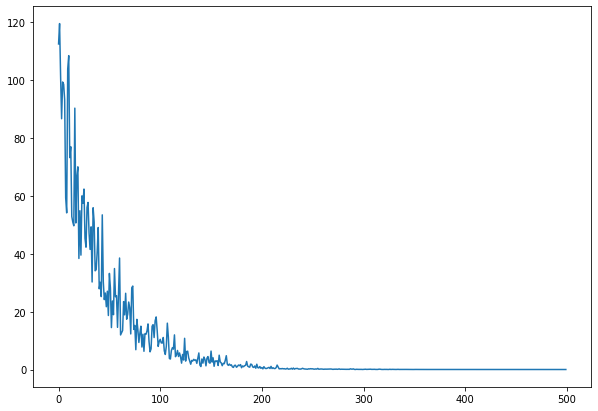

In [73]:
plt.plot(losses)